# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [2]:
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [3]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows=30000, na_values={"Primary Breed": ['Unknown'], "Animal Name": ['Unknown', 'UNKNOWN']})

In [4]:
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

* *Tip: there's an option with `.read_csv` to only read in a certain number of rows*

In [5]:
df.shape

(30000, 15)

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [6]:
# Each row is a pet for which a license has been given.
# "Primary breed"'s column refers to the main race of the animal.
# "Sprayed or neut"'s column describes whether the animal has been sterilized or not.

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [7]:
# How many dogs have their licenses expiring in 2020?
# What is the average age of sterilized dogs?
# What is the most common dominant color for dogs born before 2010?
# What is the vaccination rate for dogs born after 2012 and whose license expires in 2020?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [8]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

<AxesSubplot:>

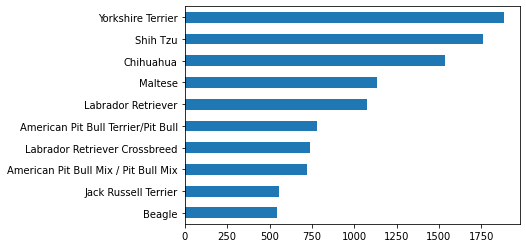

In [9]:
df.primary_breed.value_counts().head(10).sort_values(ascending=True).plot(kind="barh")

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

* *Tip: Maybe you want to go back to your `.read_csv` and use `na_values=`? Maybe not? Up to you!*

<AxesSubplot:>

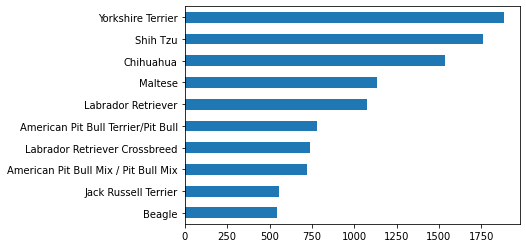

In [10]:
df.primary_breed.value_counts().head(10).sort_values(ascending=True).plot(kind="barh")

## What are the most popular dog names?

In [11]:
df.animal_name.value_counts().sort_values(ascending=False).head(30)

Max                      202
Bella                    193
Charlie                  172
Lola                     146
Rocky                    140
Lucy                     128
Coco                     114
Buddy                    113
Lucky                    106
Daisy                     90
Lily                      88
Princess                  86
Bailey                    83
Luna                      81
Molly                     81
Oliver                    79
Toby                      79
Chloe                     78
Teddy                     76
Sophie                    75
Stella                    74
unknown                   71
Dog Name Not Provided     71
Milo                      68
Riley                     64
Cooper                    63
Penny                     63
Ruby                      63
Jack                      61
Ginger                    60
Name: animal_name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [12]:
df.query("animal_name == 'Daniel'")

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date


In [13]:
df.query("animal_name == 'Max'").animal_name.value_counts()

Max    202
Name: animal_name, dtype: int64

In [14]:
df.query("animal_name == 'Maxwell'").animal_name.value_counts()

Maxwell    11
Name: animal_name, dtype: int64

## What percentage of dogs are guard dogs?

In [15]:
df.guard_or_trained.value_counts()

No     19809
Yes       17
Name: guard_or_trained, dtype: int64

In [16]:
df.guard_or_trained.str.contains("No", na=False).value_counts()

True     19809
False    10191
Name: guard_or_trained, dtype: int64

In [17]:
df.guard_or_trained.str.contains("Yes").value_counts() * 100 / df.guard_or_trained.value_counts(dropna=False).sum()

False    66.030000
True      0.056667
Name: guard_or_trained, dtype: float64

In [18]:
# 0.056% of dogs are guard dogs

## What are the actual numbers?

In [26]:
df.guard_or_trained.value_counts()

No     19809
Yes       17
Name: guard_or_trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`. Think about missing data!

In [23]:
df.shape

(30000, 15)

In [24]:
df.guard_or_trained.value_counts(dropna=False)

No     19809
NaN    10174
Yes       17
Name: guard_or_trained, dtype: int64

## Maybe fill in all of those empty "Guard or Trained" columns with "No"? Or as `NaN`? 

Can we make an assumption either way? Then check your result with another `.value_counts()`

In [22]:
df[df.guard_or_trained.str.contains("No", na=False)]

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
7,10465,Yogi,M,Boxer,NaN,TAN,BLACK,NaN,2010-09-01,Yes,No,Yes,2014-09-12 16:47:35.317,2014-09-12,2017-10-02
8,10013,Chewbacca,F,Labrador Retriever Crossbreed,NaN,RED,NaN,NaN,2012-06-01,Yes,No,Yes,2014-09-12 17:42:56.647,2014-09-12,2019-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,10019,Cece,F,Lhasa Apso,NaN,WHITE,NaN,NaN,2008-01-01,Yes,No,Yes,2015-08-22 18:49:52.060,2015-08-22,2020-09-24
29995,11372,Bella,F,NaN,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28
29998,11217,daisy,F,NaN,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05


In [25]:
df.guard_or_trained.str.contains("No", na=False).value_counts()

True     19809
False    10191
Name: guard_or_trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [42]:
df[df.guard_or_trained == "Yes"].primary_breed.value_counts().head(10)

German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: primary_breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [128]:
df['year'] = df['animal_birth'].apply(lambda birth: birth.year)
df.head()

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date,year,age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,15
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,9
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,8
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,14
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,8


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [129]:
df['age'] = 2022 - df['year']
df.head()

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date,year,age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,15
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,9
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,8
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,14
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,8


In [67]:
df['age'].mean()

12.712433333333333

# Joining data together

In [75]:
df2 = pd.read_csv("zipcodes-neighborhoods.csv")
df2.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [130]:
merged = df.merge(df2, left_on='owner_zip_code', right_on='zip')
merged.head()

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,15,Upper West Side,10024,Manhattan
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,14,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,11,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,NaN,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,11,Upper West Side,10024,Manhattan
4,10024,Harlen,M,NaN,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,15,Upper West Side,10024,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

You'll want to do these separately, and filter for each.

In [133]:
merged[merged.neighborhood.str.contains("Bronx", na=False)].animal_name.value_counts().sort_values(ascending=False).head()

Rocky    15
Bella    15
Max      14
Lucky    12
Buddy    12
Name: animal_name, dtype: int64

In [87]:
merged[merged.neighborhood.str.contains("Brooklyn", na=False)].animal_name.value_counts().sort_values(ascending=False).head()

Max        28
Charlie    27
unknown    25
Lucy       22
Rocky      21
Name: animal_name, dtype: int64

In [88]:
merged[merged.neighborhood.str.contains("Upper East Side", na=False)].animal_name.value_counts().sort_values(ascending=False).head()

Charlie    19
Bella      12
NO NAME    11
Lola       10
Lucy       10
Name: animal_name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

* *Tip: There are a few ways to do this, and some are awful (see the "top 5 breeds in each borough" question below).*

In [99]:
merged.groupby(by='neighborhood').primary_breed.value_counts().sort_values(ascending=False)

neighborhood     primary_breed               
Upper West Side  Labrador Retriever              121
West Queens      Shih Tzu                         95
Upper East Side  Havanese                         94
South Shore      Shih Tzu                         90
                 Yorkshire Terrier                85
                                                ... 
Lower East Side  Petit Basset Griffon Vendeen      1
                 Parson Russell Terrier            1
                 Norfolk Terrier                   1
                 Newfoundland                      1
West Queens      Wire Fox Terrier                  1
Name: primary_breed, Length: 3987, dtype: int64

In [ ]:
# I think there's a few more things to do...

## What breed of dogs are the least likely to be spayed? Male or female?

* *Tip: This has a handful of interpretations, and some are easier than others. Feel free to skip it if you can't figure it out to your satisfaction.*

In [148]:
df.groupby(by='spayed_or_neut').primary_breed.value_counts()

spayed_or_neut  primary_breed                     
No              Yorkshire Terrier                     537
                Shih Tzu                              405
                Chihuahua                             306
                Maltese                               306
                American Pit Bull Terrier/Pit Bull    173
                                                     ... 
Yes             Spinone Italiano                        1
                Thai Ridgeback                          1
                Tibetan Mastiff                         1
                Welsh Springer Spaniel                  1
                Xoloitzcuintli                          1
Name: primary_breed, Length: 428, dtype: int64

In [155]:
df[df.spayed_or_neut == "No"].primary_breed.value_counts().sort_values(ascending=False).head(10)

Yorkshire Terrier                     537
Shih Tzu                              405
Chihuahua                             306
Maltese                               306
American Pit Bull Terrier/Pit Bull    173
Pomeranian                            148
German Shepherd Dog                   125
Labrador Retriever                    113
Golden Retriever                      111
Cocker Spaniel                         97
Name: primary_breed, dtype: int64

In [122]:
df.groupby(by='spayed_or_neut').animal_gender.value_counts()

spayed_or_neut  animal_gender
No              M                 3384
                F                 1953
Yes             M                12874
                F                11786
                                     3
Name: animal_gender, dtype: int64

In [124]:
df[df.spayed_or_neut == "No"].animal_gender.value_counts()

M    3384
F    1953
Name: animal_gender, dtype: int64

## Make a new column called `monochrome` that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [190]:
df['animal_dominant_color'] = df['animal_dominant_color'].str.lower()
df['animal_secondary_color'] = df['animal_secondary_color'].str.lower()
df['animal_third_color'] = df['animal_third_color'].str.lower()
df.head()

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date,year,age,monochrome
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,brown,black,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,15,BROWN
1,10461,Indie Zephir,M,Rottweiler,NaN,black,tan,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,9,BLACK
2,10013,Bilal,M,Australian Cattledog,NaN,rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,8,Rust
3,10025,Buddy,M,NaN,Cockapoo,blond,white,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,14,BLOND
4,10013,Ali,M,Basenji,NaN,black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,8,Black


In [191]:
df.animal_dominant_color.value_counts()

black         8201
white         6703
brown         3236
tan           3107
blond         1323
gray          1108
brindle       1038
red            822
fawn           740
cream          687
rust           581
gold           534
blue           481
chocolate      388
apricot        356
orange         217
silver         188
blue merle      93
charcoal        72
sable            9
red sesame       1
Name: animal_dominant_color, dtype: int64

In [202]:
monochrome = ['black', 'white', 'grey', 'gray']

In [ ]:
# df['monochrome'] = df['animal_dominant_color'].apply(lambda ["BLACK", "WHITE", "GREY"]: animal_dominant_color)
# df.head()

In [166]:
# df['monochrome'] = df['animal_dominant_color'].apply(lambda animal_dominant_color: black + white)

In [167]:
# df['monochrome'] = df.apply(lambda color: BLACK.animal_dominant_color + WHITE.animal_dominant_color, axis=1)

In [ ]:
# I think I'm stuck here...

## How many dogs are in each borough? Plot it in a graph.

<AxesSubplot:>

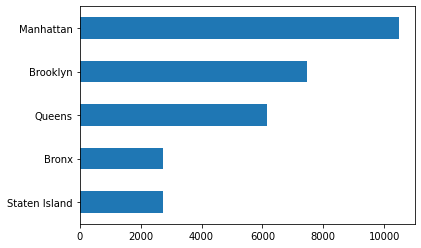

In [213]:
merged.borough.value_counts().sort_values().plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [220]:
df3 = pd.read_csv("boro_population.csv")
df3.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [221]:
merged2 = merged.merge(df3, left_on='owner_zip_code', right_on='population')
merged2.head()

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,...,license_issued_date,license_expired_date,year,age,neighborhood,zip,borough_x,borough_y,population,area_sqmi


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.